In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
np.random.seed(10)

In [2]:
filepath="data/pima-indians-diabetes.xls"
all_df=pd.read_excel(filepath)

In [3]:
cols=['Outcome','Pregnancies','Glucose','Blood','Skin','Insulin',
      'BMI','Diabetes', 'Age']
all_df=all_df[cols]

In [4]:
all_df[:5]

,Outcome,Pregnancies,Glucose,Blood,Skin,Insulin,BMI,Diabetes,Age
0,1,6,148,72,35,0,33.6,0.627,50
1,0,1,85,66,29,0,26.6,0.351,31
2,1,8,183,64,0,0,23.3,0.672,32
3,0,1,89,66,23,94,28.1,0.167,21
4,1,0,137,40,35,168,43.1,2.288,33


In [5]:
zero_not_accepted = ['Glucose', 'Blood', 'Skin', 'BMI', 'Insulin']       
for column in zero_not_accepted: 
    mean = int(all_df[column].mean(skipna=True))
    all_df[column].replace(0, mean,inplace=True) 

In [6]:
msk = np.random.rand(len(all_df)) < 0.8
train_df = all_df[msk]
test_df = all_df[~msk]
print('total:',len(all_df),
      'train:',len(train_df),
      'test:',len(test_df))   

total: 768 train: 616 test: 152


In [7]:
trainray= train_df.values
train_Features = trainray[:,1:]
train_Label = trainray[:,0]
    
testray= test_df.values
test_Features = testray[:,1:]
test_Label = testray[:,0]

    
train_Features=StandardScaler().fit_transform(train_Features)
test_Features=StandardScaler().fit_transform(test_Features)

In [8]:
train_Features[:2]

array([[ 0.68004207,  0.88222526, -0.02133549,  0.86471493, -0.41811974,
         0.17467821,  0.45102803,  1.46416999],
       [-0.82248991, -1.18724996, -0.5141854 ,  0.24389395, -0.41811974,
        -0.83134882, -0.36630283, -0.17444596]])

In [9]:
train_Label[:2]

array([1., 0.])

In [10]:
test_Features[:2]

array([[ 1.63837785,  1.4616998 ,  0.1510988 , -0.56924141, -0.43622157,
         0.82197801,  0.25283098, -0.01013739],
       [ 0.20550424,  1.39550634, -0.01777633, -0.66985152,  0.64246766,
        -1.0515176 ,  0.41798057,  1.36854704]])

In [11]:
test_Label[:2]

array([1., 1.])

In [12]:
from keras.utils import np_utils
train_Label = train_Label.reshape(train_Label.shape[0], 1)
test_Label= test_Label.reshape(test_Label.shape[0], 1)
train_Label=np_utils.to_categorical(train_Label)
test_Label=np_utils.to_categorical(test_Label)

Using TensorFlow backend.


In [13]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

In [14]:
train_Features.shape

(616, 8)

In [15]:
train_Features = train_Features.reshape(train_Features.shape[0], 8, 1, 1)

In [16]:
model = Sequential()

In [17]:
model.add(Conv2D(filters=1000,
                 kernel_size=(1,1),
                 padding='valid',
                 input_shape=(8,1,1), 
                 activation='relu'))

In [18]:
model.add(Conv2D(filters=1000,
                 kernel_size=(1,1),
                 padding='valid',
                 activation='relu'))

In [19]:
model.add(MaxPooling2D(pool_size=(1, 1)))

In [20]:
model.add(Dropout(0.25))

In [21]:
model.add(Flatten())

In [22]:
model.add(Dense(128, activation='tanh'))

In [23]:
model.add(Dropout(0.25))

In [24]:
model.add(Dense(2,activation='sigmoid'))

In [25]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 8, 1, 1000)        2000      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 1, 1000)        1001000   
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 1, 1000)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 1, 1000)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8000)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1024128   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

In [26]:
model.compile(loss='mean_squared_error',
              optimizer='Nadam',metrics=['accuracy']) 
model.fit(x=train_Features,y=train_Label)

Epoch 1/1
616/616 [==============================] - 7s 12ms/step - loss: 0.1809 - acc: 0.7192


In [27]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.2, 
                         epochs=10, 
                         batch_size=70,verbose=1)

Train on 492 samples, validate on 124 samples
Epoch 1/10
492/492 [==============================] - 4s 9ms/step - loss: 0.1452 - acc: 0.7703 - val_loss: 0.2447 - val_acc: 0.6855
Epoch 2/10
492/492 [==============================] - 5s 10ms/step - loss: 0.1575 - acc: 0.7805 - val_loss: 0.1576 - val_acc: 0.7903
Epoch 3/10
492/492 [==============================] - 4s 8ms/step - loss: 0.1478 - acc: 0.7825 - val_loss: 0.1623 - val_acc: 0.7823
Epoch 4/10
492/492 [==============================] - 5s 10ms/step - loss: 0.1415 - acc: 0.7744 - val_loss: 0.2476 - val_acc: 0.6452
Epoch 5/10
492/492 [==============================] - 4s 9ms/step - loss: 0.1761 - acc: 0.7317 - val_loss: 0.1536 - val_acc: 0.7500
Epoch 6/10
492/492 [==============================] - 4s 9ms/step - loss: 0.1505 - acc: 0.7581 - val_loss: 0.1933 - val_acc: 0.7097
Epoch 7/10
492/492 [==============================] - 4s 8ms/step - loss: 0.1549 - acc: 0.7520 - val_loss: 0.2004 - val_acc: 0.6613
Epoch 8/10
492/492 [========

In [28]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

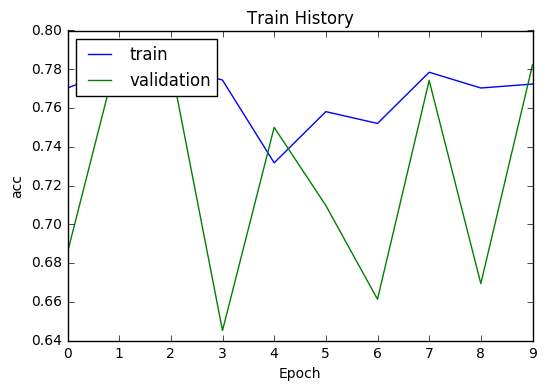

In [29]:
show_train_history(train_history,'acc','val_acc')

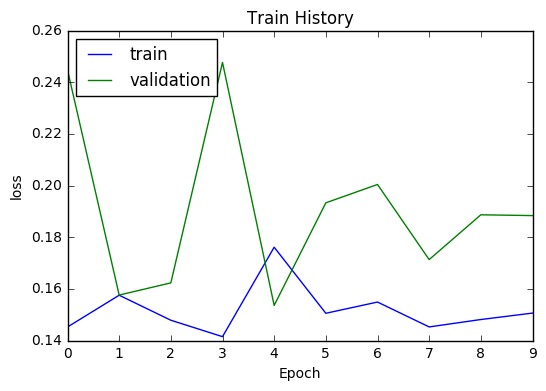

In [30]:
show_train_history(train_history,'loss','val_loss')

In [31]:
test_Features = test_Features.reshape(test_Features.shape[0], 8, 1, 1)

In [32]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

152/152 [==============================] - 0s 2ms/step


In [33]:
scores[1]

0.7368421021260714